In [1]:
import cv2
import numpy as np
import glob
from astropy.io import fits
from astropy.time import Time

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import imreg_dft as ird

%matplotlib inline
import matplotlib.pyplot as plt


import lacosmicx as lax

from photutils import aperture_photometry
from photutils import SkyCircularAperture, CircularAperture

def get_flux(data, x, y, a):
    s = data.shape
    positions = [(x, y)]
    apertures = CircularAperture(positions, r=a)
    temp = []
    for i in range(s[0]):
        temp.append(aperture_photometry(data[i, :, :], apertures)['aperture_sum'][0])
    return np.array(temp)

In [2]:
# fig, ax = plt.subplots()
# ax.plot(np.random.rand(10))

# def onclick(event):
#     print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#           ('double' if event.dblclick else 'single', event.button,
#            event.x, event.y, event.xdata, event.ydata))

# cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [3]:
def find_shift(im1x, im2x, show_image = False):
    im1 = im1x.copy()
    im2 = im2x.copy()
    
    im1 -= im1.min()
    im1 = np.log10(im1+1e-2)
    im1 -= im1.min()
    im1 = im1*255./im1.max()
    im1 = im1.astype(np.uint8)

    im2 -= im2.min()
    im2 = np.log10(im2+1e-2)
    im2 -= im2.min()
    im2 = im2*255./im2.max()
    im2 = im2.astype(np.uint8)
    
    # Read the images to be aligned
    # im1 =  im1
    # im2 =  cv2.imread("images/image2.jpg");

    # Convert images to grayscale
    im1_gray = im1
    im2_gray = im2

    # Find size of image1
    sz = im1.shape

    # Define the motion model
    warp_mode = cv2.MOTION_TRANSLATION

    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Specify the number of iterations.
    number_of_iterations = 5000;

    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-10;

    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)

    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        # Use warpPerspective for Homography 
        im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else :
        # Use warpAffine for Translation, Euclidean and Affine
        im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

    # Show final results
    if show_image:
        cv2.imshow("Image 1", im1)
        cv2.imshow("Image 2", im2)
        cv2.imshow("Aligned Image 2", im2_aligned)
        cv2.waitKey(0)
        
    return warp_matrix

In [4]:
# i=0
# print(files2[i])
# d1 = fits.open(files2[i])
# plt.figure(figsize=(14,14))
# # plt.subplot(211)
# plt.imshow(np.log10(d1[1].data[0:1000,2000:3000]/d1[0].header['EXPTIME']), origin='lower', vmax = 0.5, vmin=-2)


In [5]:
files2 = glob.glob("m0416_datd/*.fits") 
files2 = np.sort(files2)
print(files2)

['m0416_datd/jbsta3kkq_flc.fits' 'm0416_datd/jbsta3knq_flc.fits'
 'm0416_datd/jbsta5cgq_flc.fits' 'm0416_datd/jbsta5cjq_flc.fits'
 'm0416_datd/jbsta8x1q_flc.fits' 'm0416_datd/jbsta8x4q_flc.fits'
 'm0416_datd/jbstb5ehq_flc.fits' 'm0416_datd/jbstb5ekq_flc.fits'
 'm0416_datd/jc8o01ipq_flc.fits' 'm0416_datd/jc8o01irq_flc.fits'
 'm0416_datd/jc8o01ivq_flc.fits' 'm0416_datd/jc8o01iyq_flc.fits'
 'm0416_datd/jc8o03f0q_flc.fits' 'm0416_datd/jc8o03f2q_flc.fits'
 'm0416_datd/jc8o03f6q_flc.fits' 'm0416_datd/jc8o03f9q_flc.fits'
 'm0416_datd/jc8o05k2q_flc.fits' 'm0416_datd/jc8o05k4q_flc.fits'
 'm0416_datd/jc8o05k8q_flc.fits' 'm0416_datd/jc8o05kdq_flc.fits'
 'm0416_datd/jc8o06kjq_flc.fits' 'm0416_datd/jc8o06klq_flc.fits'
 'm0416_datd/jc8o06kpq_flc.fits' 'm0416_datd/jc8o06ksq_flc.fits'
 'm0416_datd/jc8o08udq_flc.fits' 'm0416_datd/jc8o08ufq_flc.fits'
 'm0416_datd/jc8o08ujq_flc.fits' 'm0416_datd/jc8o08umq_flc.fits'
 'm0416_datd/jc8o10aoq_flc.fits' 'm0416_datd/jc8o10aqq_flc.fits'
 'm0416_datd/jc8o10auq_fl

In [6]:
d1[0].header['FILTER2']

NameError: name 'd1' is not defined

In [7]:
for fi in files2:
#     print(fi)
    d1 = fits.open(fi)
    print(d1[0].header['EXPTIME'])

452.0
534.0
453.0
534.0
525.0
507.0
525.0
507.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
1225.0
1307.0
1507.0
1207.0
465.0
499.0
499.0
493.0


In [8]:
d1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2018-06-24' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   15 / Number of standard extensions                  
FILENAME= 'jca9s2rvq_flc.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [48]:
for fi in files2:
    print(fi)
    d1 = fits.open(fi)
    # detector 1
    q1 = d1[1].data
    b1 = lax.lacosmicx(q1)
    # detector 2
    q2 = d1[4].data
    b2 = lax.lacosmicx(q2)
    np.savez(fi+'.npz', orig=[q1, q2], clean=[b1[1], b2[1]], mask=[b1[0], b2[0]], exptime=d1[0].header['EXPTIME'])
    

m0416_datd/jc8o23kzq_flc.fits
m0416_datd/jc8o20jtq_flc.fits
m0416_datd/jc8o26elq_flc.fits
m0416_datd/jc8o08udq_flc.fits
m0416_datd/jc8o15daq_flc.fits
m0416_datd/jc8o28l7q_flc.fits
m0416_datd/jc8ob0pdq_flc.fits
m0416_datd/jc8oa8brq_flc.fits
m0416_datd/jc8o03f6q_flc.fits
m0416_datd/jc8o06klq_flc.fits
m0416_datd/jc8o01ipq_flc.fits
m0416_datd/jc8o33poq_flc.fits
m0416_datd/jc8o13pjq_flc.fits
m0416_datd/jc8ob1puq_flc.fits
m0416_datd/jc8o25m1q_flc.fits
m0416_datd/jc8o31xaq_flc.fits
m0416_datd/jc8o26ejq_flc.fits
m0416_datd/jc8o18haq_flc.fits
m0416_datd/jc8ob0pbq_flc.fits
m0416_datd/jc8o15dgq_flc.fits
m0416_datd/jbstb5ekq_flc.fits
m0416_datd/jc8oa8byq_flc.fits
m0416_datd/jc8o33piq_flc.fits
m0416_datd/jc8o15djq_flc.fits
m0416_datd/jc8o20jjq_flc.fits
m0416_datd/jc8ob1psq_flc.fits
m0416_datd/jc8o03f0q_flc.fits
m0416_datd/jc8o06kjq_flc.fits
m0416_datd/jc8o01ivq_flc.fits
m0416_datd/jc8o31x0q_flc.fits
m0416_datd/jc8o10auq_flc.fits
m0416_datd/jc8o30slq_flc.fits
m0416_datd/jc8ob1pyq_flc.fits
m0416_datd

In [9]:
fi = files2[34]
dat = np.load(fi+'.npz')
# plt.figure(figsize=(14,14))
# plt.imshow(dat['clean'][1][0:1000,2000:3000] / dat['exptime'], vmin=0,vmax=0.1, origin='lower')
# , orig=[q1, q2], clean=[b1[1], b2[1]], mask=[b1[0], b2[0]], exptime=d1[0].header['EXPTIME'])
t1 = dat['clean'][1][0:1000,2000:3000] / dat['exptime']
t1[t1<0.1] = 0.1
t1[t1>1] = 1.

res = []
for i in range(len(files2)):
    fi = files2[i]
    dat2 = np.load(fi+'.npz')
    t2 =  dat2['clean'][1][0:1000,2000:3000] / dat2['exptime']
    t2[t2<0.1] = 0.1
    t2[t2>1] = 1.
    t = ird.translation(t1,t2)
    res.append(t['tvec'])
    print(i, t)
    if t['success']<0.1:
        t2 =  dat2['clean'][0][0:1000,2000:3000] / dat2['exptime']
        t2[t2<0.1] = 0.1
        t2[t2>1] = 1.
        t = ird.translation(t1,t2)
        print(i, t)




0 {'tvec': array([   1.08605424, -309.73683636]), 'success': 0.05648446913401463, 'angle': 0}
0 {'tvec': array([  1.3050663 , 184.03346435]), 'success': 0.044075362413295995, 'angle': 180}
1 {'tvec': array([   3.14026948, -131.90128435]), 'success': 0.04629623001209366, 'angle': 180}
1 {'tvec': array([  0.43107981, 265.89213676]), 'success': 0.04474724402320681, 'angle': 0}
2 {'tvec': array([   2.98354342, -289.93095581]), 'success': 0.05692423769419137, 'angle': 180}
2 {'tvec': array([   1.13891656, -206.97340223]), 'success': 0.06255532824058295, 'angle': 0}
3 {'tvec': array([  0.88704556, -70.16107352]), 'success': 0.033381436352253345, 'angle': 0}
3 {'tvec': array([  1.51835382, 300.94363581]), 'success': 0.030294699579009883, 'angle': 0}
4 {'tvec': array([-8.68290722e-02,  1.77868059e+02]), 'success': 0.05624947963713148, 'angle': 0}
4 {'tvec': array([  3.22315576, 254.8129606 ]), 'success': 0.06705342234950079, 'angle': 180}
5 {'tvec': array([-156.05850422, -248.80411382]), 'succ

82 {'tvec': array([-4.73435465, -5.06895979]), 'success': 0.4020532857712251, 'angle': 0}
83 {'tvec': array([ -3.06405673, -12.30107913]), 'success': 0.37447391346271747, 'angle': 0}
84 {'tvec': array([-93.42542851, -12.80280233]), 'success': 0.3107520369427702, 'angle': 0}
85 {'tvec': array([-91.86480692, -19.88486252]), 'success': 0.31469860299174784, 'angle': 0}
86 {'tvec': array([  1.17704505, -15.13061784]), 'success': 0.4012998849589442, 'angle': 0}
87 {'tvec': array([  3.00712008, -22.26785079]), 'success': 0.3804236628782784, 'angle': 0}
88 {'tvec': array([-89.36152264,   1.31691582]), 'success': 0.32141635356481596, 'angle': 0}
89 {'tvec': array([-87.88480433,  -5.90806515]), 'success': 0.31168219296674704, 'angle': 0}
90 {'tvec': array([ 5.22423473, -1.12907003]), 'success': 0.38171859731827185, 'angle': 0}
91 {'tvec': array([ 6.88783667, -8.28306881]), 'success': 0.3555123205310738, 'angle': 0}
92 {'tvec': array([-92.79847959, -15.83544168]), 'success': 0.3370175011636436, '

In [10]:
def f(i):
    plt.figure(2, figsize=(14,14))
    fi = files2[i]
    d1 = fits.open(fi)
    t = d1[0].header['EXPTIME']
    dat = np.load(fi+'.npz')
    im0 = np.array(dat['orig'][1]) / t
    im0c = np.array(dat['clean'][1]) / t
    im = im0[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
    im = im - np.median(im0c)
    plt.figure(211)
    plt.imshow(im , vmin=0, vmax=.2, origin='lower')
    im = im0c[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
    im = im - np.median(im0c)
    plt.figure(212)
    plt.imshow(im , vmin=0, vmax=.2, origin='lower')
    plt.show()
    print(fi, d1[0].header['DATE-OBS'])

interactive_plot = interactive(f, i=(0, len(files2)-1, 1))
output = interactive_plot.children[-1]
# output.layout.width = '1000px'
interactive_plot

interactive(children=(IntSlider(value=53, description='i', max=107), Output()), _dom_classes=('widget-interact…

In [40]:
q = np.zeros([100,200,len(files2)])
for i in range(8,104):
    print(i)
    fi = files2[i]
    d1 = fits.open(fi)
    t = d1[0].header['EXPTIME']
    dat = np.load(fi+'.npz')
    im0 = np.array(dat['orig'][1]) / t
    im0c = np.array(dat['clean'][1]) / t
    im = im0[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
    im = im # - np.median(im0c)
    q[:,:,i] += im
#     im = im0c[50-int(res[i][0]):150-int(res[i][0]),
#                    2550-int(res[i][1]):2750-int(res[i][1])]
#     im = im - np.median(im0c)



8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


(75.0, 110.0, 25.0, 45.0)

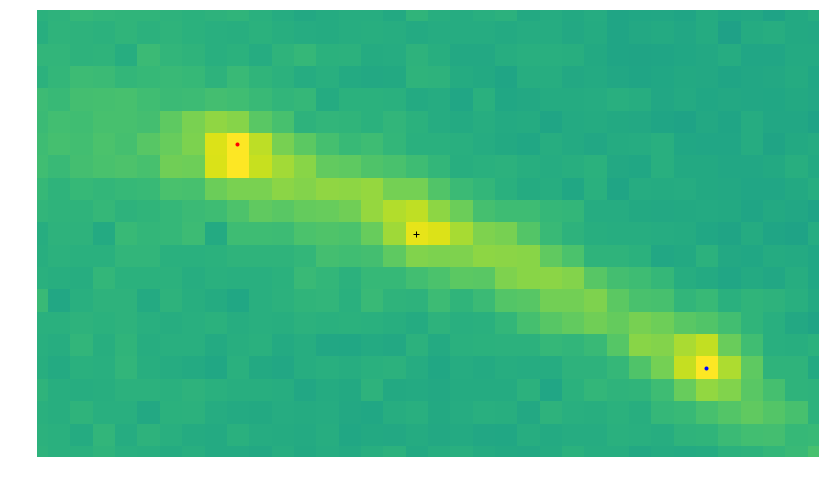

In [49]:
l=np.median(q[:,:,8:104],2)

plt.figure(figsize=(14,14))
plt.imshow(l, vmin=0, vmax=0.1, origin='lower')
plt.xlim([75,110])
plt.ylim([25,45])
plt.plot([84,], [39, ], '.r')
plt.plot([92], [ 35], '+k')
plt.plot([105], [29], '.b')
plt.axis('off')

In [50]:
def f(i):
    plt.figure(2, figsize=(14,14))
    fi = files2[i]
    d1 = fits.open(fi)
    t = d1[0].header['EXPTIME']
    dat = np.load(fi+'.npz')
    im0 = np.array(dat['orig'][1]) / t
    im0c = np.array(dat['clean'][1]) / t
    im = im0[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
    im = im - np.median(im0c)
    plt.figure(211)
    plt.imshow(im, vmin=-.00, vmax=.15, origin='lower')
#     im = im0c[50-int(res[i][0]):150-int(res[i][0]),
#                    2550-int(res[i][1]):2750-int(res[i][1])]
#     im = im - np.median(im0c)
    plt.xlim([60,120])
    plt.ylim([20,50])
    plt.figure(212)
    plt.imshow(im-l, vmin=-0.05, vmax=0.05, origin='lower')
    plt.xlim([60,120])
    plt.ylim([20,50])
    plt.show()
    print(fi, d1[0].header['DATE-OBS'])

interactive_plot = interactive(f, i=(0, len(files2)-1, 1))
output = interactive_plot.children[-1]
# output.layout.width = '1000px'
interactive_plot

interactive(children=(IntSlider(value=53, description='i', max=107), Output()), _dom_classes=('widget-interact…

m0416_datd/jc8o30scq_flc.fits 2014-01-23
m0416_datd/jc8o30seq_flc.fits 2014-01-23
m0416_datd/jc8o30siq_flc.fits 2014-01-23
m0416_datd/jc8o30slq_flc.fits 2014-01-23


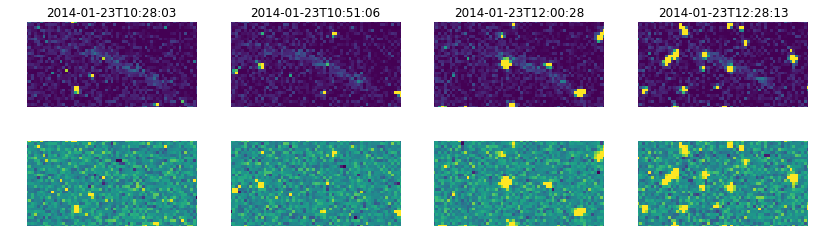

In [17]:
plt.figure(2, figsize=(14,4))

j=0
t=76
for i in range(t,t+4):
    j+=1
    fi = files2[i]
    d1 = fits.open(fi)
    t = d1[0].header['EXPTIME']
    dat = np.load(fi+'.npz')
    im0 = np.array(dat['orig'][1]) / t
    im0c = np.array(dat['clean'][1]) / t
    im = im0[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
    im = im - np.median(im0c)
    plt.subplot(2,4,j)
    plt.imshow(im, vmin=-.00, vmax=.15, origin='lower')
    plt.axis('off')
    plt.title(d1[0].header['DATE-OBS']+'T'+d1[0].header['TIME-OBS'])
#     im = im0c[50-int(res[i][0]):150-int(res[i][0]),
#                    2550-int(res[i][1]):2750-int(res[i][1])]
#     im = im - np.median(im0c)
    plt.xlim([60,120])
    plt.ylim([20,50])
    plt.subplot(2,4,4+j)
    plt.imshow(im-l, vmin=-0.05, vmax=0.05, origin='lower')
    plt.axis('off')
    plt.xlim([60,120])
    plt.ylim([20,50])
    
    print(fi, d1[0].header['DATE-OBS'])

# interactive_plot = interactive(f, i=(0, len(files2)-1, 1))
# output = interactive_plot.children[-1]
# # output.layout.width = '1000px'
# interactive_plot

In [18]:


Time(d1[0].header['DATE-OBS']+'T'+d1[0].header['TIME-OBS'], format='isot', scale='utc').mjd

56680.519594907404

In [71]:
dates = []
images = []
images_cl = []

for i in range(len(files2)):
    fi = files2[i]
    d1 = fits.open(fi)
    t = d1[0].header['EXPTIME']
    dat = np.load(fi+'.npz')
    im0 = np.array(dat['orig'][1]) / t
    im0c = np.array(dat['clean'][1]) / t
    im = im0[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
    imc = im0c[50-int(res[i][0]):150-int(res[i][0]),
                   2550-int(res[i][1]):2750-int(res[i][1])]
#     im = im - np.median(im0c)
    images.append(im)
    images_cl.append(imc)
    dates.append(Time(d1[0].header['DATE-OBS']+'T'+d1[0].header['TIME-OBS'], 
                 format='isot', scale='utc').mjd)
    print(dates[-1])
    

56144.78689814815
56144.794386574074
56157.81858796296
56157.82608796296
56170.70211805555
56170.710023148145
56184.73625
56184.744155092594
56662.64962962963
56662.70209490741
56662.77118055556
56662.839212962965
56663.56288194445
56663.578888888886
56663.62850694444
56663.69795138889
56664.42681712963
56664.442824074074
56664.4884375
56664.50770833333
56664.55935185185
56664.5753587963
56664.624340277776
56664.69368055555
56665.48997685185
56665.5059837963
56665.55127314815
56665.570543981485
56666.35387731482
56666.36988425926
56666.41490740741
56666.43417824074
56666.48679398148
56666.502800925926
56666.547789351855
56666.56706018518
56669.275092592594
56669.29109953704
56669.33849537037
56669.357766203706
56670.60721064815
56670.62321759259
56670.66753472222
56670.68680555555
56671.15568287037
56671.19920138889
56671.26565972222
56671.33211805556
56671.60350694445
56671.61951388889
56671.66439814815
56671.68366898148
56672.06828703704
56672.08429398148
56672.129594907405
56672.196

In [72]:
images_cl = np.array(images_cl)
images = np.array(images)

/Users/kaurov/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'MJD')

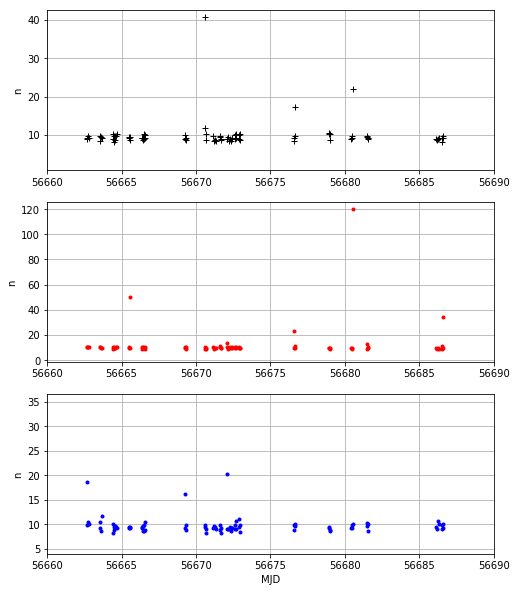

In [73]:
fluxes=[]
x, y = [84,88,92,98,105], [39, 37, 35, 33, 29]
for i in range(5):
#     print(x,y)
    fluxes.append(get_flux(images, x[i], y[i], 1.5))

    
plt.figure(figsize=(8,10))

plt.subplot(311)
plt.plot(dates, renorm(fluxes[2] / temp), 'k+')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
# plt.ylim([20, 30])
plt.grid('on')
plt.ylabel('n')


plt.subplot(312)
plt.plot(dates, renorm(fluxes[0] / temp), '.r')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
# plt.ylim([20, 30])
plt.grid('on')
plt.ylabel('n')


plt.subplot(313)
plt.plot(dates, renorm(fluxes[4] / temp), '.b')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
# plt.ylim([20, 30])
plt.grid('on')
# plt.plot(dates, fluxes[2], 'or')
# plt.plot(dates, fluxes[0], '.k')
# plt.plot(dates, fluxes[4], '.b')

# plt.xlim([56660, 56690])
# plt.xlim([56675, 56681])
# plt.ylim([0, 0.8])
# plt.grid('on')
# plt.ylim([0.2, .5])

plt.ylabel('n')
plt.xlabel('MJD')

(56660, 56690)

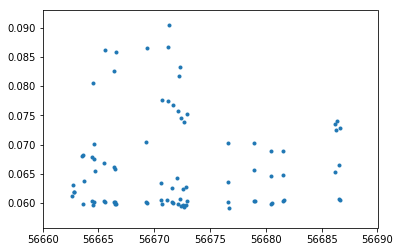

In [74]:
plt.plot(dates, temp, '.')
plt.xlim([56660, 56690])

In [90]:
def renorm(d):
    t = (d-np.median(d))
    t /= np.percentile(t,67)#/d.std()
    return t

/Users/kaurov/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'MJD')

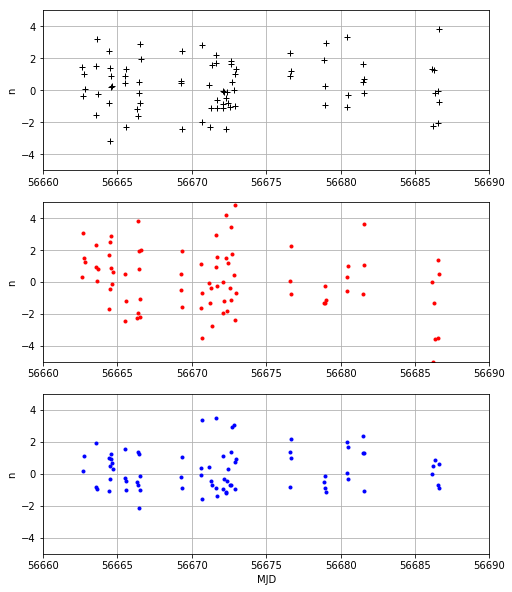

In [92]:
temp = np.median(images_cl, [1,2])

fluxes=[]
x, y = [84,88,92,98,105], [39, 37, 35, 33, 29]
for i in range(5):
#     print(x,y)
    fluxes.append(get_flux(images, x[i], y[i], 2.5))

    
plt.figure(figsize=(8,10))

plt.subplot(311)
plt.plot(dates, renorm(fluxes[2] / temp), 'k+')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
plt.ylim([-5, 5])
plt.grid('on')
plt.ylabel('n')


plt.subplot(312)
plt.plot(dates, renorm(fluxes[0] / temp), '.r')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
plt.ylim([-5, 5])
plt.grid('on')
plt.ylabel('n')


plt.subplot(313)
plt.plot(dates, renorm(fluxes[4] / temp), '.b')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
plt.ylim([-5, 5])
plt.grid('on')
# plt.plot(dates, fluxes[2], 'or')
# plt.plot(dates, fluxes[0], '.k')
# plt.plot(dates, fluxes[4], '.b')

# plt.xlim([56660, 56690])
# plt.xlim([56675, 56681])
# plt.ylim([0, 0.8])
# plt.grid('on')
# plt.ylim([0.2, .5])

plt.ylabel('n')
plt.xlabel('MJD')

/Users/kaurov/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'MJD')

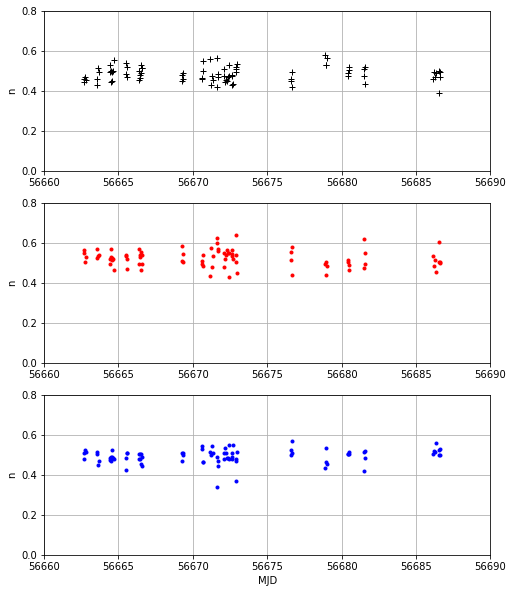

In [78]:
fluxes=[]
x, y = [84,88,92,98,105], [39, 37, 35, 33, 29]
for i in range(5):
#     print(x,y)
    fluxes.append(get_flux(images_cl, x[i], y[i], 1.5))

    
plt.figure(figsize=(8,10))

plt.subplot(311)
plt.plot(dates, renorm(fluxes[2]/(fluxes[0]+fluxes[4])), 'k+')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
plt.ylim([0, 0.8])
plt.grid('on')
plt.ylabel('n')


plt.subplot(312)
plt.plot(dates, renorm(fluxes[0]/(fluxes[2]+fluxes[4])), '.r')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
plt.ylim([0, 0.8])
plt.grid('on')
plt.ylabel('n')


plt.subplot(313)
plt.plot(dates, renorm(fluxes[4]/(fluxes[0]+fluxes[2])), '.b')
plt.xlim([56675, 56681])
plt.xlim([56660, 56690])
plt.ylim([0, 0.8])
plt.grid('on')
# plt.plot(dates, fluxes[2], 'or')
# plt.plot(dates, fluxes[0], '.k')
# plt.plot(dates, fluxes[4], '.b')

# plt.xlim([56660, 56690])
# plt.xlim([56675, 56681])
# plt.ylim([0, 0.8])
# plt.grid('on')
# plt.ylim([0.2, .5])

plt.ylabel('n')
plt.xlabel('MJD')

In [96]:
x

NameError: name 'x' is not defined

In [55]:



fi = files2[0]
dat = np.load(fi+'.npz')
im0 = np.array(dat['clean'][0][0:2000,0:2000])

res = [[0,0]]
bads = [False]
for i in range(1, len(files2)):
    fi = files2[i]
    dat = np.load(fi+'.npz')
    im1 = np.array(dat['clean'][0][0:2000,0:2000])
    result = ird.similarity(im0, im1, numiter=3)
    print(result['angle'])
    if np.abs(result['angle']) < 1:
        res.append(result['tvec'])
        bads.append(False)
    else:
        res.append([0,0])
        bads.append(True)
    print(bads[-1])
#         im1 = np.array(dat['clean'][1][::-1,::-1][0:2000,0:2000])
#         result = ird.similarity(im0, im1, numiter=3)
#         print(result['angle'])
        


/Users/kaurov/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


-179.98532038684652
True
0.009450765643634895
False
179.99757237342652
True
-0.022264668977385327
False
-179.997366244616
True
-0.019470354754332675
False
0.013237536116832871
False
0.018761242047247606
False
0.01449964056601516
False
-0.03506723737871198
False


KeyboardInterrupt: 

In [50]:
result

{'tvec': array([-140.10689237,  541.78106268]),
 'success': 0.07402101549243231,
 'angle': -0.08347313541651147,
 'scale': 0.9989663534187219,
 'Dscale': 0.0008760111413112842,
 'Dangle': 0.0225,
 'Dt': 0.25,
 'timg': array([[29.086554, 29.345741, 29.449625, ..., 33.43368 , 31.003838,
         27.289167],
        [28.839869, 29.282537, 29.43489 , ..., 20.167454, 22.284533,
         27.38609 ],
        [28.660166, 29.272642, 29.444586, ..., 24.595861, 32.47695 ,
         26.5462  ],
        ...,
        [29.48649 , 29.498177, 29.511877, ..., 29.489801, 29.49001 ,
         29.483456],
        [29.441856, 29.469307, 29.494812, ..., 29.554317, 29.499474,
         29.440062],
        [29.317278, 29.41862 , 29.473022, ..., 30.072903, 29.641296,
         29.278633]], dtype=float32)}

292.95272916201066


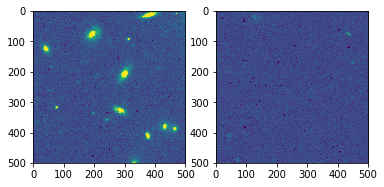

In [11]:
print(result['tvec'][0])

plt.subplot(121)
plt.imshow(im0[250:750,2000:2500], vmin=0,vmax=300)

plt.subplot(122)
plt.imshow(im1[250:750,2000:2500], vmin=0,vmax=300)

# plt.imshow(im1[250-int(result['tvec'][0]):750-int(result['tvec'][0]),
#                2000-int(result['tvec'][1]):2500-int(result['tvec'][1])], vmin=0,vmax=300)


In [15]:
def f(i):
    plt.figure(2, figsize=(14,14))
    fi = files2[i]
    d1 = fits.open(fi)
    t = d1[0].header['EXPTIME']
    dat = np.load(fi+'.npz')
    im0 = np.array(dat['orig'][1])/t
    plt.imshow(im0[:300,2500:2800] , vmin=0, vmax=.2, origin='lower')
    plt.show()
    print(fi, d1[0].header['DATE-OBS'])

interactive_plot = interactive(f, i=(0, len(files2)-1, 1))
output = interactive_plot.children[-1]
# output.layout.width = '1000px'
interactive_plot

interactive(children=(IntSlider(value=53, description='i', max=107), Output()), _dom_classes=('widget-interact…

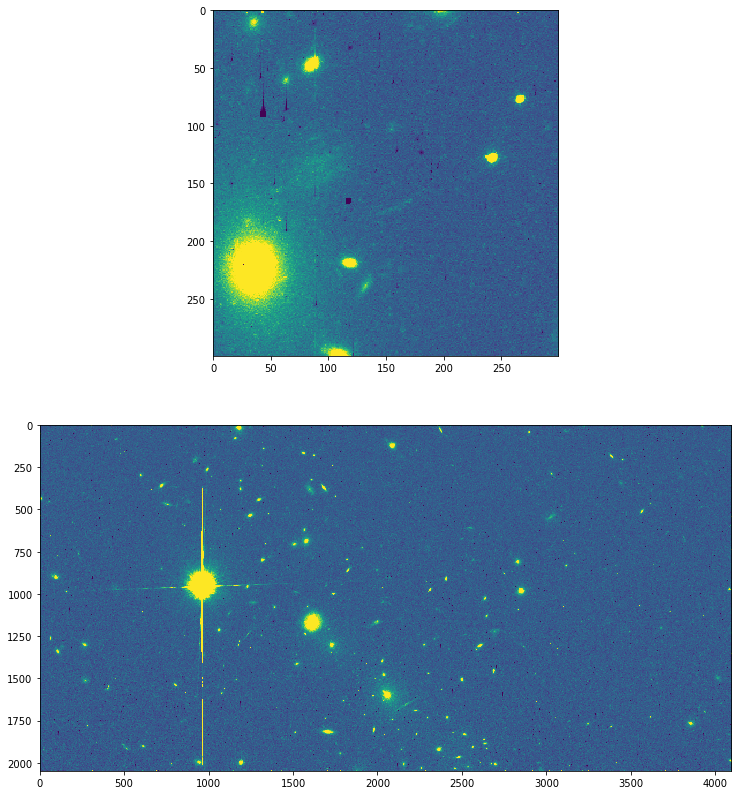

In [79]:
plt.figure(figsize=(14,14))


fi = files2[18]
dat = np.load(fi+'.npz')
im0 = np.array(dat['clean'][1])

fi = files2[1]
dat = np.load(fi+'.npz')
im1 = np.array(dat['clean'][0])

plt.subplot(211)
plt.imshow(im0[:300,2500:2800], vmin=0,vmax=300)

plt.subplot(212)

# # -140.10689237,  541.78106268

# plt.imshow(result['timg'], vmin=0,vmax=300)
plt.imshow(im1[:,:], vmin=0,vmax=300)

In [68]:
q = d1[4].data
b = lax.lacosmicx(q)

/Users/kaurov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


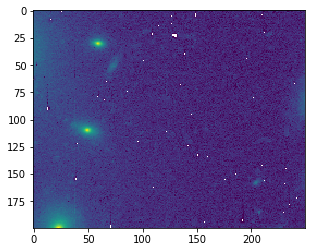

In [42]:
plt.imshow(np.log10(b[1][100:300,2550:2800]/d1[0].header['EXPTIME']), vmax = .5, vmin=-1.5)

In [7]:

d1 = fits.open(files2[0])
qwe = d1[4].data
bwe = lax.lacosmicx(qwe)


In [8]:
bwe[1]

array([[  79.72384 ,   38.03349 ,   80.797295, ...,   87.37878 ,
          94.335686,  150.0646  ],
       [  70.777855,   54.921627,   80.85831 , ...,   66.62689 ,
          52.706253,   70.28448 ],
       [  72.98636 ,   72.37661 ,   58.25296 , ...,   82.8024  ,
          71.44774 ,   71.80976 ],
       ...,
       [  72.86331 ,   72.874084,   57.421597, ...,   68.83576 ,
          69.60984 ,   48.908867],
       [  57.742886,   63.14586 ,   65.72476 , ...,   95.32321 ,
          57.146305,   78.66871 ],
       [  36.051163,   59.960598,   67.56228 , ..., 1005.9639  ,
          50.24301 ,   55.74582 ]], dtype=float32)

In [9]:
b[1][0:1000,2000:3000]

array([[ 72.35959 ,  54.553722,  51.537838, ..., 104.45906 ,  64.922615,
         56.166943],
       [ 53.86445 ,  52.847515,  56.61096 , ...,  77.35224 ,  61.599392,
         51.967823],
       [ 61.5567  ,  85.33606 ,  59.672905, ...,  42.720375,  66.437935,
         62.04685 ],
       ...,
       [ 45.848003,  60.931545,  71.77684 , ...,  61.72113 ,  57.06209 ,
         48.832703],
       [ 67.32735 ,  70.02759 ,  51.07901 , ...,  61.423782,  74.00045 ,
         67.94939 ],
       [ 90.87078 ,  61.976936,  56.538647, ...,  61.48727 ,  63.611015,
         59.26201 ]], dtype=float32)

In [27]:
find_shift(1.0*(b[1][0:1000,2000:3000]), 1.0*(bwe[1][80:1080,2000:3000]))

array([[ 1.      ,  0.      , -9.840813],
       [ 0.      ,  1.      , 16.5608  ]], dtype=float32)

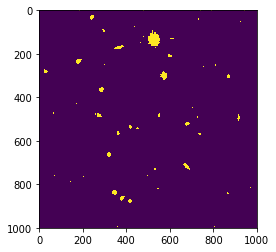

In [11]:
plt.imshow(b[1][0:1000,2000:3000]>200)

/Users/kaurov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


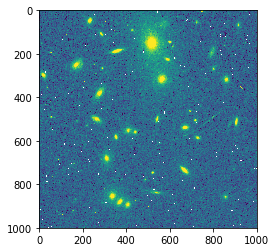

In [17]:
plt.imshow(np.log10(bwe[1][0+80:1000+80,2000:3000]), vmax = 2.5, vmin=1.5)

/Users/kaurov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


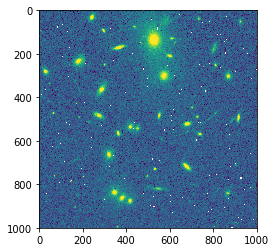

In [14]:
plt.imshow(np.log10(b[1][0:1000,2000:3000]), vmax = 2.5, vmin=1.5)